## 1. Descripción del Dataset

### Importancia del dataset y problemas que pretende resolver. Variables que lo forman y su tamaño.

El dataset proporcionado contiene información detallada sobre diversos fármacos aprobados desde el año 2002 hasta 2024. Este conjunto de datos es importante porque proporciona una visión amplia de los medicamentos aprobados en este período, incluyendo detalles críticos como el nombre del fármaco, la molécula activa, la forma de dosificación, la fecha de aprobación, la compañía que lo produce, las condiciones tratadas y más. Esta información es valiosa para investigadores, médicos, farmacéuticos y reguladores para entender mejor el panorama de los medicamentos aprobados, analizar tendencias, comparar precios y evaluar la eficacia y seguridad de los tratamientos.

Con el fin de proceder a analizar nuestro dataset, vamos de descargarlo desde Zenodo https://zenodo.org/records/11357994 y lo guardamos en el directorio actual.


In [ ]:
import requests

# URL directa del archivo en Zenodo
url = 'https://zenodo.org/record/11357994/files/farmacos_2002_2024_v3.csv'

# Nombre del archivo local
file_name = "farmacos_2002_2025_v3.csv"

# Descargar el archivo desde Zenodo
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Guardar el archivo en el directorio actual
    with open(file_name, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado y guardado:", file_name)
else:
    print("Error al descargar el archivo:", response.status_code)


Archivo descargado y guardado: farmacos_2002_2025_v3.csv


Ahora sí, exploramos brevemente las columnas que tiene nuestro dataset y revisamos los valores brevemente para ver si por ahora todo está bien.

In [ ]:
import pandas as pd
df = pd.read_csv(file_name)
df.head()

,name,molecule,dosage_form,date_of_approval,company,treatment_for,url,molecule_url,drug_class,image,...,CSA Schedule*,Approval History,WADA Class,most_reviewed_condition,most_reviewed_rating,n_reviews,number_side_effects,price,shop_dosis,prices_url
0,Abecma,idecabtagene vicleucel,Suspension for Intravenous Infusion,"March 26, 2021",Bristol Myers Squibb,Multiple Myeloma,https://www.drugs.com/abecma.html,https://www.drugs.com/mtm/idecabtagene-vicleuc...,Miscellaneous antineoplastics,NaN,...,Not a controlled drug,NaN,NaN,NaN,NaN,NaN,84.0,"$524,833.07",Abecma,https://www.drugs.com/price-guide/abecma
1,Abilify Asimtufii,aripiprazole,Extended-Release Injectable Suspension,"April 27, 2023","Otsuka Pharmaceutical Co., Ltd.","Schizophrenia, Bipolar Disorder",https://www.drugs.com/abilify-asimtufii.html,https://www.drugs.com/aripiprazole.html,NaN,NaN,...,Not a controlled drug,Drug history at FDA,NaN,NaN,NaN,NaN,2.0,"$4,463.44",720 mg/2.4 mL,https://www.drugs.com/price-guide/abilify-asim...
2,Abilify Maintena,aripiprazole,for Extended-Release Injectable Suspension,"February 28, 2013","Otsuka Pharmaceutical Co., Ltd. and H. Lundbec...","Schizophrenia, Bipolar Disorder",https://www.drugs.com/abilify-maintena.html,https://www.drugs.com/aripiprazole.html,Atypical antipsychotics,NaN,...,Not a controlled drug,NaN,NaN,Schizophrenia,6.4,37.0,2.0,"$2,236.47",300 mg,https://www.drugs.com/price-guide/abilify-main...
3,Abraxane,paclitaxel protein-bound,for Injectable Suspension,"January 7, 2005","American Pharmaceutical Partners, Inc. / Ameri...","Breast Cancer, Non-Small Cell Lung Cancer, Pan...",https://www.drugs.com/abraxane.html,https://www.drugs.com/mtm/paclitaxel-protein-b...,Mitotic inhibitors,NaN,...,Not a controlled drug,NaN,NaN,NaN,NaN,NaN,21.0,"$1,673.30",100 mg,https://www.drugs.com/price-guide/abraxane
4,Abrilada,adalimumab-afzb,Injection,"November 15, 2019",Pfizer Inc.,"Rheumatoid Arthritis, Juvenile Idiopathic Arth...",https://www.drugs.com/abrilada.html,https://www.drugs.com/adalimumab.html,TNF alfa inhibitors,NaN,...,Not a controlled drug,Drug history at FDA,NaN,NaN,NaN,NaN,19.0,"$2,925.30",afzb 20 mg/0.4 mL,https://www.drugs.com/price-guide/abrilada


Revisamos la estructura y la calidad de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     1713 non-null   object 
 1   molecule                 1654 non-null   object 
 2   dosage_form              1590 non-null   object 
 3   date_of_approval         1720 non-null   object 
 4   company                  1713 non-null   object 
 5   treatment_for            1714 non-null   object 
 6   url                      1720 non-null   object 
 7   molecule_url             1671 non-null   object 
 8   drug_class               1606 non-null   object 
 9   image                    0 non-null      float64
 10  related_drugs            805 non-null    object 
 11  rating                   579 non-null    float64
 12  reviews                  579 non-null    object 
 13  reviews_url              579 non-null    object 
 14  side_effects_url        

Vemos que tenemos 27 variables, muchas de ellas con valores nulos que posteriormente tendremos que recuperar -si se trata de variables de interés, claro está.

El objetivo del dataset es proporcionar una fuente de información centralizada sobre los fármacos aprobados, permitiendo responder a preguntas tales como:

¿Cuáles son los fármacos más recientes aprobados para ciertas condiciones médicas? ¿Qué compañías farmacéuticas están detrás de la mayoría de los nuevos fármacos? ¿Cómo varían los precios de los medicamentos y sus formas de dosificación? ¿Cuáles son las moléculas activas más comunes y sus respectivas clases de fármacos? Entre otras preguntas.

En lo que concierne al alcance de este trabajo, nos proponemos intentar descubrir cuáles son los factores que pueden hacer que un droga sea calificada como droga de abuso por la CSA e intentar predecir esta calificación allí donde falte. Un segundo objetivo es intentar agrupar nuestras observaciones de manera tal que los equipos de producto puedan obtener información valiosa sobre los diferentes fármacos que hay en el mercado y qué hace que un fármaco se considere aceptado por el público.

### Variables del Dataset y su Tamaño

El dataset consta de 1720 registros con 27 columnas, cada una representando diferentes aspectos de los fármacos. A continuación se resumen brevemente las variables:


*   *name:* Nombre del fármaco
*   *molecule:* Molécula activa del fármaco
*   *dosage_form:* Forma de dosificación del fármaco
*   *date_of_approval:* Fecha de aprobación del fármaco
*   *company:* Compañía farmacéutica que produce el fármaco
*   *treatment_for:* Condiciones médicas que trata el fármaco
*   *url:* URL de referencia del fármaco
*   *molecule_url:* URL de referencia de la molécula
*   *drug_class:* Clase del fármaco
*   *image:* Imagen del fármaco
*   *related_drugs:* Fármacos relacionados
*   *reviews_url:* URL de reseñas
*   *side_effects_url:* URL de efectos secundarios
*   *rating:* Calificación del fármaco basada en reseñas
*   *reviews:* Número de reseñas
*   *Availability:* Disponibilidad del fármaco con la prescripcion medica
*   *Pregnancy & Lactation:* Información sobre embarazo y lactancia
*   *CSA Schedule:* Clasificación según la CSA
*   *Approval History:* Historia de aprobación
*   *WADA Class:* Clasificación según la WADA
*   *most_reviewed_condition:* Condición más reseñada
*   *most_reviewed_rating:* Calificación de la condición más reseñada
*   *n_reviews:* Número de reseñas para la condición más reseñada
*   *number_side_effects:* Número de efectos secundarios
*   *price:* Precio del fármaco
*   *shop_dosis:* Dosis para la venta
*   *prices_url:* URL de precios


### Tamaño del Dataset

El dataset ocupa aproximadamente 362.9 KB en memoria, lo cual implica que es relativamente pequeño y manejable para la mayoría de los análisis en entornos computacionales modernos.

En resumen, este dataset proporciona una visión integral de los fármacos aprobados en las últimas dos décadas, permitiendo diversos tipos de análisis para diferentes stakeholders en el ámbito de la salud y la farmacología.

## 2. Integración y selección de los datos de interés a analizar.
*Puede ser el resultado de adicionar diferentes datasets o una subselección útil de los datos originales, en base al objetivo que se quiera conseguir. Si se decide trabajar con una selección de los datos, es muy importante que esta esté debidamente justificada. Además, se recomienda mostrar un resumen de los datos que permita ver a simple vista las diferentes variables y sus rangos de valores.*

### Definición del objetivo de análisis

Antes de empezar con la selección de datos, vamos a definir el objetivo del análisis, que es:

1. Detectar factores en la calificación de abuso de la CSA y predecir la calificación.
2. Detectar grupos de fármacos que muestren aceptación en el público.

### Selección de datos de interés

Basándonos en los objetivos del análisis, seleccionaremos las columnas que contienen la información relevante por ahora. Estas columnas son:

*   *name:* Nombre del fármaco

*   *dosage_form:* Forma de dosificación

*   *date_of_approval:* Fecha de aprobación

*   *treatment_for:* Indicaciones

*   *drug_class:* Clase del fármaco

*   *rating:* Calificación basada en reseñas

*   *reviews:* Número de reseñas

*   *Availability:* Disponibilidad (prescripción médica vs sin prescripción médica)

*   *number_side_effects:* Cantidad de efectos secundarios

*   *price:* Precio del fármaco

### Justificación de la Selección

Hemos seleccionado estas columnas porque proporcionan la información necesaria para abordar cada uno de los objetivos planteados:

`date_of_approval` nos puede ser útil para tener una medida de la antigüedad del fármaco en el mercado.

`treatment_for` y `number_side_effects` nos ayudan a investigar la relación entre las indicaciones de nuevos fármacos y la cantidad de efectos secundarios.

`Availability` nos permite comparar el porcentaje de fármacos que requieren prescripción médica frente a los que no la requieren.

`price` junto con `dosage_form` nos da la información necesaria para analizar la oscilación de precios de los nuevos fármacos.

Finalmente, `name` nos sirve para identificar cada fármaco de manera única.

Por otro lado, dejamos fuera de momento `CSA Schedule*`, que será nuestra variable objetivo, aunque la utilizaremos más adelante.

Creamos un subset de datos y copiamos el juego de datos para trabajar sobre un dataframe nuevo.

In [ ]:
selected_columns = ["name", "dosage_form", "date_of_approval", "treatment_for", "rating", "reviews", "Availability", "number_side_effects", "price"]
df_interes = df[selected_columns].copy()
df_interes.head()

,name,dosage_form,date_of_approval,treatment_for,rating,reviews,Availability,number_side_effects,price
0,Abecma,Suspension for Intravenous Infusion,"March 26, 2021",Multiple Myeloma,NaN,NaN,Prescription only,84.0,"$524,833.07"
1,Abilify Asimtufii,Extended-Release Injectable Suspension,"April 27, 2023","Schizophrenia, Bipolar Disorder",NaN,NaN,Prescription only,2.0,"$4,463.44"
2,Abilify Maintena,for Extended-Release Injectable Suspension,"February 28, 2013","Schizophrenia, Bipolar Disorder",6.2,63,Prescription only,2.0,"$2,236.47"
3,Abraxane,for Injectable Suspension,"January 7, 2005","Breast Cancer, Non-Small Cell Lung Cancer, Pan...",NaN,NaN,Prescription only,21.0,"$1,673.30"
4,Abrilada,Injection,"November 15, 2019","Rheumatoid Arthritis, Juvenile Idiopathic Arth...",NaN,NaN,Prescription only,19.0,"$2,925.30"


A continuación haremos un resumen de los datos que permita ver a simple vista las diferentes variables y sus rangos de valores.

### Resumen General del DataFrame

In [ ]:
# para demostrar un resumen general del DataFrame, incluyendo el número de valores no nulos y el tipo de datos de cada columna.s, usamos el codigo de info()
df_interes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1713 non-null   object 
 1   dosage_form          1590 non-null   object 
 2   date_of_approval     1720 non-null   object 
 3   treatment_for        1714 non-null   object 
 4   rating               579 non-null    float64
 5   reviews              579 non-null    object 
 6   Availability         1716 non-null   object 
 7   number_side_effects  1537 non-null   float64
 8   price                1365 non-null   object 
dtypes: float64(2), object(7)
memory usage: 121.1+ KB


### Resumen estadísticas descriptivas numéricas


In [ ]:
# para demostrar un resumen estadísticas descriptivas numéricas, usamos el codigo de describe()
df_interes.describe()

,rating,number_side_effects
count,579.000000,1537.000000
mean,6.556477,14.500325
std,1.476719,15.751328
min,1.100000,1.000000
25%,5.700000,2.000000
50%,6.600000,8.000000
75%,7.550000,21.000000
max,10.000000,88.000000


Observaciones:

Podemos observar rapidamente que el dataframe contiene valores nulos y faltantes. En la columna de `price` contiene el simbolo `$`, que deberíamos eliminar y transformar el valor en entero. En la columna de `dosage_from`, la descripcion categórica se puede simplificar. También hay algunas variables que son numéricas y no estan asignadas como numéricas (para esto debemos realizar un proceso de la conversión de estas variables). En el siguiente paso realizamos el proceso de la limpieza de los datos, mejorando nuestro dataframe para un análisis adecuado.

## 3. Limpieza de los datos

**3.1. ¿Los datos contienen ceros, elementos vacíos u otros valores numéricos que indiquen la pérdida de datos? Gestiona cada uno de estos casos utilizando el método de imputación que consideres más adecuado.**

Para verificar si los datos contienen ceros, elementos vacíos u otros valores numéricos que indiquen la pérdida de datos, primero realizamos un análisis detallado de los valores en el DataFrame:

In [ ]:
# Verificamos la presencia de valores ceros en el DataFrame
(df_interes == 0).sum()

name                   0
dosage_form            0
date_of_approval       0
treatment_for          0
rating                 0
reviews                0
Availability           0
number_side_effects    0
price                  0
dtype: int64

In [ ]:
# Verificamos la presencia de valores nulos en el DataFrame
df_interes.isnull().sum()

name                      7
dosage_form             130
date_of_approval          0
treatment_for             6
rating                 1141
reviews                1141
Availability              4
number_side_effects     183
price                   355
dtype: int64

Un analisis detallado nos permite ver que no hay presencia de valores ceros, pero sí que hay presencia de valores nulos en el DataFrame que necesitan diferentes métodos de imputacion para trabajarlos según sea el caso.

1.   **Imputación para la columna `name`**: como es un dato de referencia y es único para indica nuevo farmaco, para el valor faltante de esta columna podemos ingresar este valor por la referencia de la molecula de dataset orginal. Si ambos son nulos, podemos dejar este valor nulo, ya que es solo de referencia.


In [ ]:
# Imputación para la columna 'name'
import pandas as pd

# Creamos una copia del DataFrame original para trabajar
df_interes_cleaned = df_interes.copy()

# Si el valor en 'name' es nulo, intentamos rellenar con el valor de 'molecule' del DataFrame original 'df'
# Si 'molecule' también es nulo, dejamos el valor como nulo
df_interes_cleaned['name'] = df_interes_cleaned.apply(
    lambda row: df.loc[row.name, 'molecule'] if pd.isnull(row['name']) and 'molecule' in df.columns and not pd.isnull(df.loc[row.name, 'molecule']) else row['name'],
    axis=1
)

2.   **Imputación para la columna `dosage_form`**: si en la variable `shop_dosis` de dataset orginal contiene parabla "recombina" se considera como inyectable ya que los inyectables mayoriamente recombinan con alguna proteina, si solo contiene el simbolo "%" se considera como ophtalmic ya que la concentracion siempre se expresa con %, sino al valor nulo no le asignaremos nada.

In [ ]:
# Imputación para la columna 'dosage_form'
# Si shop_dosis contiene la palabra "recombina", entonces asignar "Injectable".
# Si shop_dosis contiene el símbolo "%", entonces asignar "Ophthalmic".
# En otros casos, no asignar nada a los valores nulos.

df_interes_cleaned['dosage_form'] = df_interes_cleaned.apply(
    lambda row: (
        'Injectable' if pd.isnull(row['dosage_form']) and 'recombina' in str(df.loc[row.name, 'shop_dosis']).lower() else (
            'Ophthalmic' if pd.isnull(row['dosage_form']) and '%' in str(df.loc[row.name, 'shop_dosis']) else row['dosage_form']
        )
    ),
    axis=1
)

3.   **Imputación para la columna `treatment_for`**

Tenemos 6 valores nulos en la columna treatment_for, un medicamento siempre tiene su indicacion terapeutica: puede que solo tenga una indicación o puede que tenga varias indicaciones. como más adelante creamos una columna `number_treatment_for` en funcion de la columna `treatment_for`, reemplazamos valor nulo por 'Desconocido'. La creación de la nueva variable se da más adelante.


In [ ]:
# Imputación para la columna 'treatment_for'
# Reemplazamos valores nulos por 'Desconocido'
df_interes_cleaned['treatment_for'].fillna('Desconocido', inplace=True)

4.   **Imputación para las columnas `number_side_effects`, `price`**

Como `number_side_effects` y `price` son numéricos y faltan relativamente pocos datos, podemos reemplazar estos valores nulos por la mediana de cada columna de variable.


In [ ]:
# Antes de realizar el proceso de imputacion debemos realizar el punto 3.2 de este ejercicio que el el conversion de variable y el punto 3.3 otros metodos de limpieza como eliminacion de simbolo $ para llevar a cabo el proceso de imputacion.

# paso 1: eliminamos el sibolo $ de la columna "price de df_interes_cleaned
df_interes_cleaned['price'] = df_interes_cleaned['price'].replace('[\$,]', '', regex=True)

# paso 2: convertimos las columnas 'reviews' y 'price' como numericas
df_interes_cleaned['reviews'] = pd.to_numeric(df_interes_cleaned['reviews'], errors='coerce')
df_interes_cleaned['price'] = pd.to_numeric(df_interes_cleaned['price'], errors='coerce')

# paso 3: imputación para las columnas numéricas ('rating', 'reviews', 'number_side_effects', 'price')
for col in ['number_side_effects', 'price']:
    median_value = df_interes_cleaned[col].median()
    df_interes_cleaned[col].fillna(median_value, inplace=True)

4.   **Imputación para las columna `reviews`, `rating`**

Faltan demasiados datos en estas columnas como para hacer una mediana (porque de ese modo la tendencia a la mediana sería muy fuerte). En este caso conviene usar técnicas de aprendizaje computacional para aproximar los datos. Una regresión lineal podría parecer una buena idea, pero nos daría tendencias por fuera del rango de rating, por ejemplo. Decidimos usar un k-nearest neighbours para este apartado. Una manera sencilla de hacer esta imputación es usando KNNImputer de sklearn.

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

Como vamos a necesitar hacer uso de la mayor cantidad de datos numéricos posibles, creamos una nueva columna para representar la antigüedad del fármaco desde su fecha de aprovación, expresada en meses (floats). Asignamos los nuevos datos a la columna `months_since_approval`.

In [ ]:
from datetime import datetime

start_datetime = pd.to_datetime(df_interes_cleaned['date_of_approval'])

# Obtenemos la fecha actual
today_datetime = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))

# Calculamos la diferencia en días
diff_days = (today_datetime - start_datetime).dt.days

# Calculamos los meses como floats (aproximamos cada mes a 30.4375 días)
months_float = diff_days / 30.4375

df_interes_cleaned['months_since_approval'] = months_float

También nos interesa tener una expresión numérica que represente la cantidad de enfermedades para las cuales se prescribe el fármaco. Convenientemente la columna `treatments_count` tiene las enfermedades separadas por comas y podemos usar esto para nuestro conteo.

In [ ]:
df_interes_cleaned['treatments_count'] = df_interes_cleaned['treatment_for'].str.split(',').apply(len)

Además, aprovechamos para gestionar la variable categórica `Availability`, que nos indica si el fármaco está disponible con o sin receta. Solo nos importa el valor "Prescription only", ya que el resto describe situaciones en las que se puede comprar sin receta o el fármaco está descontinuado. Además la prescripcion medica se refiere a que el fármaco se puede adquirir bajo la supervision del médico, y es más grave usar un medicamento por cuenta propia que bajo supervisión, por esto hacemos énfasis en "Prescription only".

In [ ]:
df_interes_cleaned['Availability'].value_counts()

Availability
Prescription only    1515
Discontinued          155
Rx and/or OTC          23
Over the counter       15
Unknown                 8
Name: count, dtype: int64

A razón de esto, nos conviene crear una nueva columna `is_prescription_only` para reflejar mejor esta realidad.

In [ ]:
df_interes_cleaned['is_prescription_only'] = df_interes_cleaned['Availability'].apply(
    lambda x: 1 if x == 'Prescription only' else 0)

Nos ocupamos de solamente usar las variables numéricas para nuestra imputación ya que `KNNImputer` no gestiona las variables categóricas.

In [ ]:
numerical_variables = df_interes_cleaned[['treatments_count', 'rating', 'reviews', 'is_prescription_only',
                   'number_side_effects', 'price', 'months_since_approval']].copy()

Creamos una función para poder reutilizar nuestro código de ser necesario. La función se ocupa de escalar los datos para el imputer, pero después nos devuelve un dataframe con una transformación lineal inversa que recupera las escalas originales para seguir analizándolas.

In [ ]:
def knn_imputation(dataframe):
    dataframe = dataframe.copy()

    # Inicializa el scaler y el imputer
    scaler = StandardScaler()
    imputer = KNNImputer(n_neighbors=5)

    # Escala los datos
    scaled_data = scaler.fit_transform(dataframe)

    # Realiza la imputación por KNN en los datos escalados
    imputed_scaled_data = imputer.fit_transform(scaled_data)

    # Revertimos el scaling
    imputed_data = scaler.inverse_transform(imputed_scaled_data)

    # Creamos un dataframe
    imputed_dataframe = pd.DataFrame(imputed_data, columns=dataframe.columns)

    return imputed_dataframe

Finalmente, llamamos a la función para imputar los datos perdidos de interés.

In [ ]:
imputed_df = knn_imputation(numerical_variables)

In [ ]:
imputed_df.head()

,treatments_count,rating,reviews,is_prescription_only,number_side_effects,price,months_since_approval
0,1.0,7.28,47.4,1.0,84.0,524833.07,38.275154
1,2.0,7.98,254.4,1.0,2.0,4463.44,13.240246
2,2.0,6.20,63.0,1.0,2.0,2236.47,135.129363
3,3.0,7.38,154.8,1.0,21.0,1673.30,232.837782
4,9.0,6.30,706.0,1.0,19.0,2925.30,54.603696


Vemos que seguimos teniendo 1720 filas, pero ahora no tenemos datos perdidos.

In [ ]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   treatments_count       1720 non-null   float64
 1   rating                 1720 non-null   float64
 2   reviews                1720 non-null   float64
 3   is_prescription_only   1720 non-null   float64
 4   number_side_effects    1720 non-null   float64
 5   price                  1720 non-null   float64
 6   months_since_approval  1720 non-null   float64
dtypes: float64(7)
memory usage: 94.2 KB


Realizamos una serie de gráficos de dispersión para observar relaciones entre nuestros datos y asegurarnos de que no hay linealidades. De hecho obsevamos algunas pocas, pero en general los datos rellenados parecen respetar muy bien la distribución original.

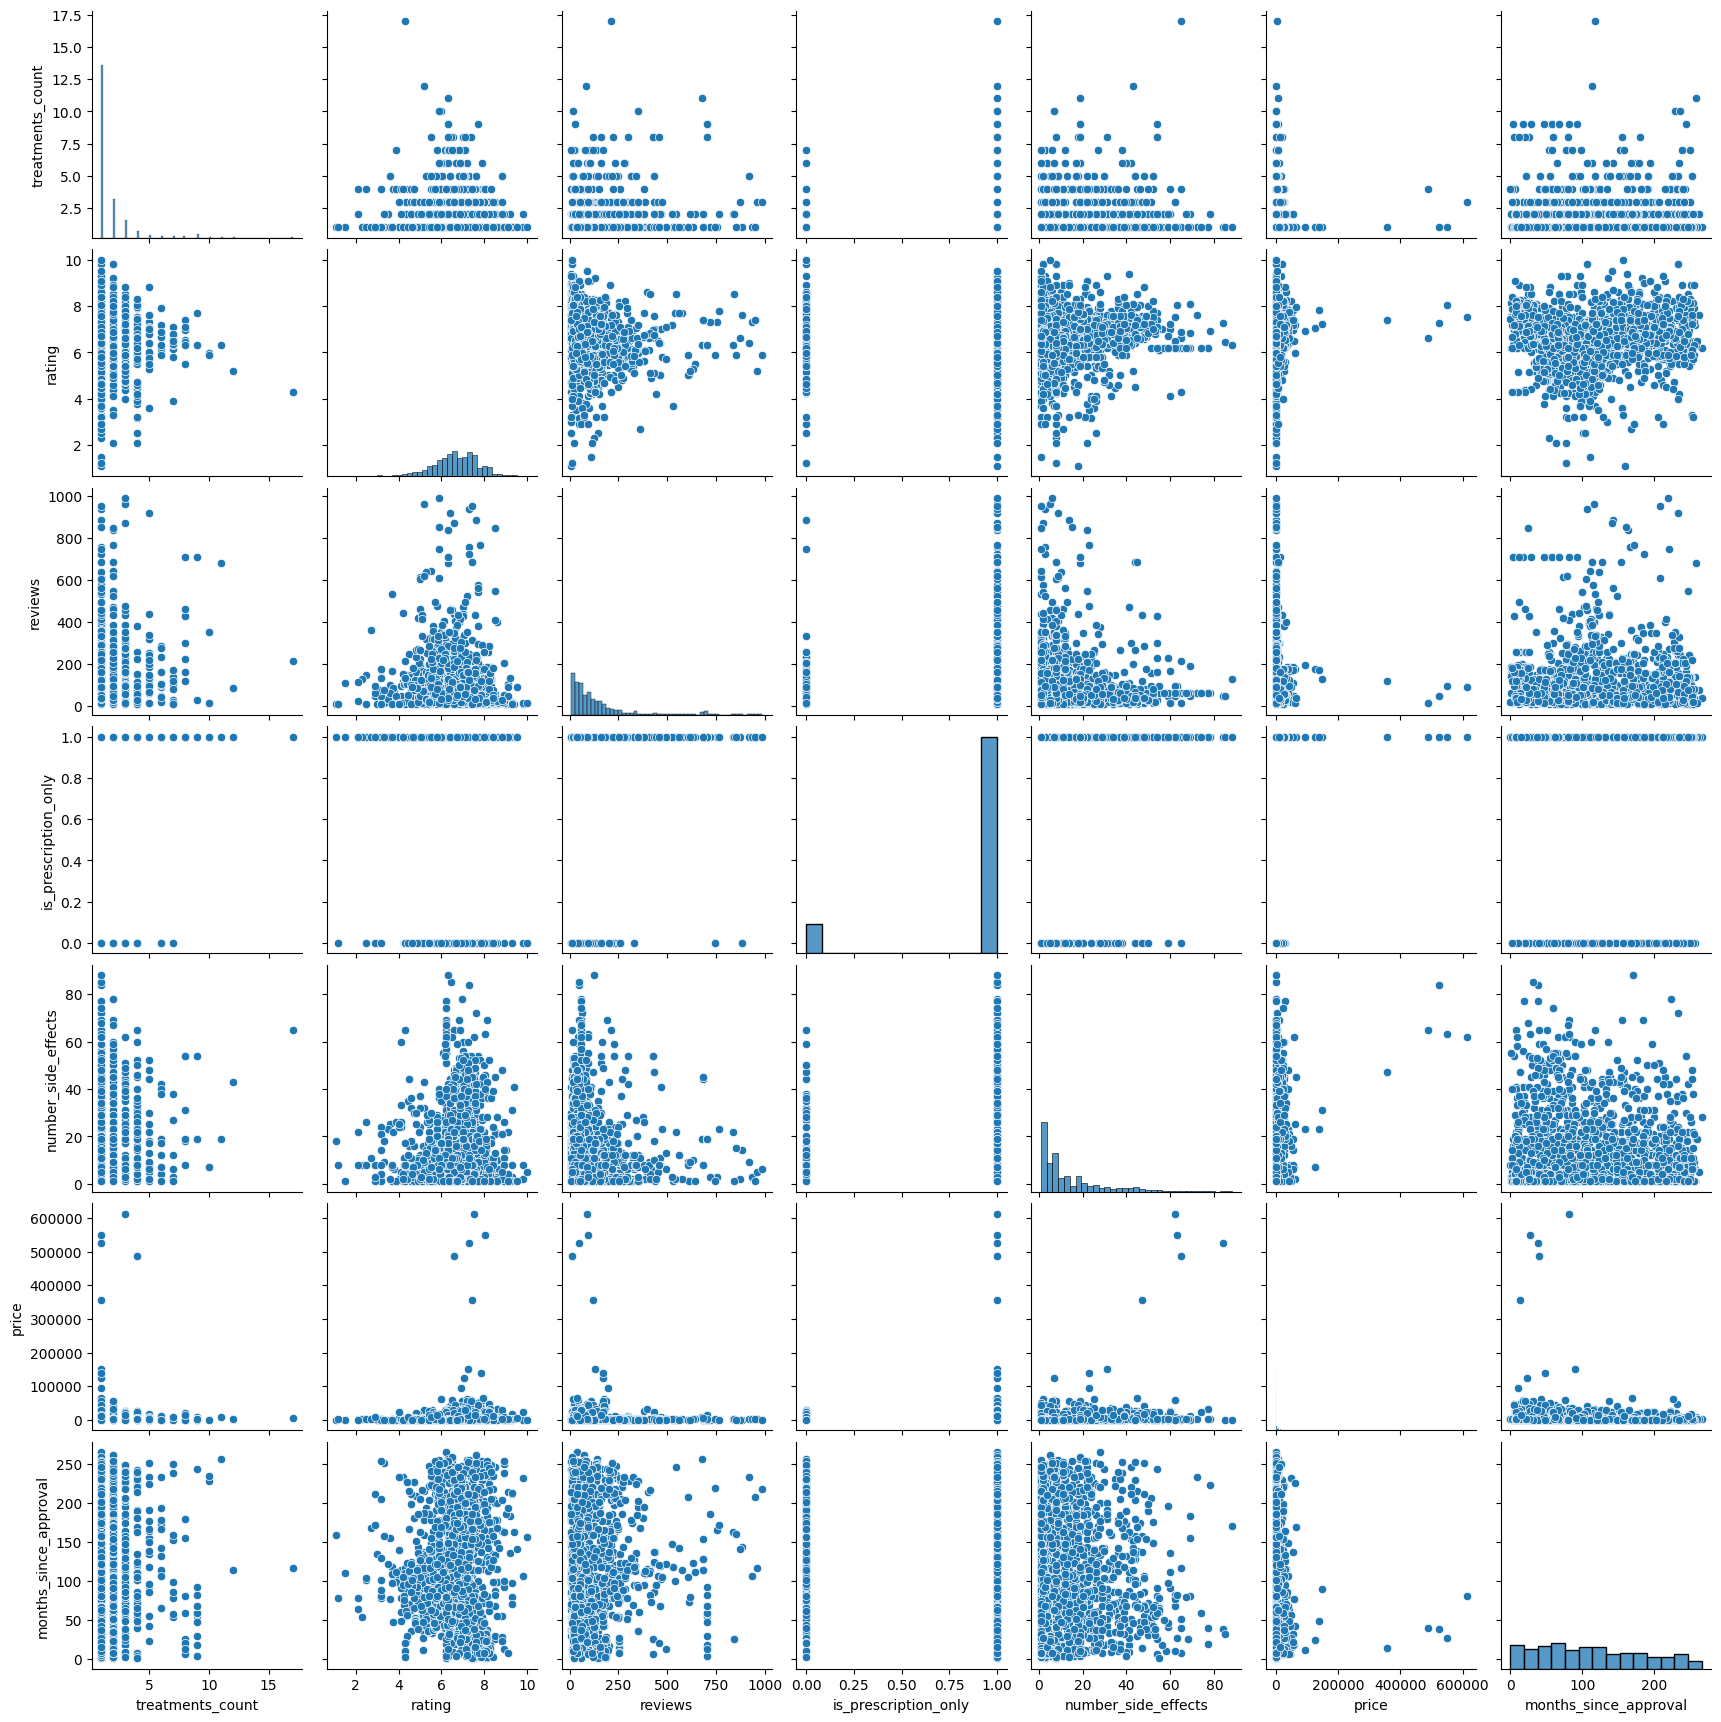

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(imputed_df)
plt.show()

A partir de ahora usamos `imputed_df` con las columnas categóricas del dataframe anterior (menos las que hemos reemplazado, como `Availability`). Este dataframe representará la realidad de que hemos terminado la fase de imputación de datos.

In [ ]:
imputed_df[['name', 'dosage_form', 'date_of_approval']] =  df_interes_cleaned[['name', 'dosage_form', 'date_of_approval']]

In [ ]:
imputed_df.head()

,treatments_count,rating,reviews,is_prescription_only,number_side_effects,price,months_since_approval,name,dosage_form,date_of_approval
0,1.0,7.28,47.4,1.0,84.0,524833.07,38.275154,Abecma,Suspension for Intravenous Infusion,"March 26, 2021"
1,2.0,7.98,254.4,1.0,2.0,4463.44,13.240246,Abilify Asimtufii,Extended-Release Injectable Suspension,"April 27, 2023"
2,2.0,6.20,63.0,1.0,2.0,2236.47,135.129363,Abilify Maintena,for Extended-Release Injectable Suspension,"February 28, 2013"
3,3.0,7.38,154.8,1.0,21.0,1673.30,232.837782,Abraxane,for Injectable Suspension,"January 7, 2005"
4,9.0,6.30,706.0,1.0,19.0,2925.30,54.603696,Abrilada,Injection,"November 15, 2019"


**3.2. Identifica y gestiona adecuadamente el tipo de dato de cada atributo (p.ej. conversión de variables categóricas en factor).**

En el apartado anterior revisabamos el resumen de los datos y vimos que las variables `reviews` y `price` no tenía adecuadamente el tipo de dato y lo hemos resuelto en apartado 3.1 durante el proceso de imputación. También hemos convertido la columna `date_of_approval` en datetime con las siguientes mejoras:
1. mejorar la eficiencia en el uso de memoria
2. mejorar el rendimiento en operaciones
3. facilidad análisis estadístico y visualización posterior

Esto nos permitió también crear una nueva columna y agregar valor a nuestro dataset.

También hemos trabajado la columna `Availability` para tener un dato numérico y simplificar la descripción que hace sobre la prescripción.

Sin embargo, no hemos trabajado las columnas `name` y `dosage_form`. A continuación las convertimos en factor.

In [ ]:
# Convertimos variables categóricas en factores
categorical_columns = ['name', 'dosage_form']
for column in categorical_columns:
    df_interes_cleaned[column] = imputed_df[column].astype('category')

**3.3. Identifica y gestiona los valores extremos.**

1. **Identificación de valores extremos:**

Para identificar los valores extremos usamos el método de visualización de box plot ya nos permite identificar rapidamente los valores outliers y los valores extraños de datos.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def add_traces(trace_data, features, figure):
  for i, feature in enumerate(features):
    # Controlamos la columna y la fila correspondiente
    row = i // 2 + 1
    col = i % 2 + 1

    # Agregamos el trace de plotly
    figure.add_trace(
      go.Box(y=trace_data[feature]),
      row=row, col=col
    )

  # Una vez terminado el ciclo, actualizamos y graficamos
  figure.update_layout(showlegend=False,
                     title_text="Distribuciones de frecuencias de los fármacos",
                     height=850)

  figure.show()

In [ ]:
figbox = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                    subplot_titles=("Tratamientos", "Opiniones", "Efectos secundarios", "Precio"),
                    vertical_spacing=0.08,
                    )

add_traces(trace_data=imputed_df, features=["treatments_count", "reviews", "number_side_effects", "price"], figure=figbox)

2. **Gestión de los valores extremos:**

Revisando box plot de la columna `number_side_effects`, observamos que los valores se corresponden dentro de los números de efectos secundarios razonables ya que un medicamento puede tener bastante efectos secundarios, pero no extiende más de 100.

Revisando box plot de la columna `reviews`, observamos que los valores se corresponden dentro de intervalo 0 - 988, por lo cual, para esta columna no hay valor outlier ni extraño.

Revisando el box plot para la columna `treatment_count`, encontramos que el máximo es 17, que es una número de indicaciones razonable para un fármaco.

Revisando box plot de la columna `price`, observamos que los valores se corresponden dentro de un rango de precios del nuevo fármaco ya que un medicamento puede ser barato o extremamente caro, pero nunca habrá precio negativo. Esto es normal y esperable; si analizáramos un dataset con una variable `ingresos`, también encontraríamos valores muy extremos y dispares. Sería diferente si encontráramos un valor "999.999", que podría deberse a un error de registro, pero no es el caso.

**Resumen:**

Después de la visualización de box plot y la discusión sobre los valores de cada boxplot, llegamos una conclusión de que los valores son razonables y aceptables, no hay valores extremos con outliers ni extraños por lo cual, no requiere gestión en este apartado.

**3.4. Justifica la necesidad de otros métodos de limpieza para este dataset en particular y, de ser necesario, aplícalos.**

Sí, en el apartado 3.1 necesitábamos otro método de limpieza como la eliminación de simbolo `$` en la columna price, ya que este símbolo no nos permitía la conversión tipo de dato de la columna `price` en numérico, ni tampoco nos permitía el proceso de imputación. Este método ya esta aplicado y solvendado durante el proceso de apartado 3.1.

Hay que recalcar otro método como **la transformación o la creación de nuevas variables** de datos que no es especifico de método limpieza sino un método para mejorar el rentimento de datos y mejorando análisis posterior. Esto ya lo hemos hecho con algunas variables, pero en un análisis posterior del dataset, creemos que podemos trabajar la columna `dosage_form`para agrupar las diferentes formas de administración de los fármacos, ya que actualmente esta columna tiene demasiadas categorías y encontramos que muchas son arbitrarias.

1. La creación de nueva variable "route of administration" a partir de dosage_form:
si en la columna dosage_from contiene parabla "comprimi", "capsule","tablet", "oral", "buccal", "enteral", "pyeloca", "lingual", "powder" asignamos la columna route of administration con "Oral".

si en la columna dosage_from contiene palabra "inject", "infusion", "formerly", "vacinne", "intrave", "elapegademase" asignamos la columna route of administration con "Parenteral".

si en la columna dosage_from contiene palabra "cream", "topic", "ointment", "lotion","gel", "emulsion" asignamos la columna route of administration con "Topic".

si en la columna dosage_from contiene palabra "nasal", "intranasal", asignamos la columna route of administration con "Nasal"

si en la columna dosage_from contiene palabra "transdermal", "implant","patch" "catheter", "foam", "dermal" asignamos la columna route of administration con "transdermal".

si en la columna dosage_from contiene palabra "ophthalmic", "intraocular", "intravitreal" asignamos la columna route of administration con "Ophtmailmic".

si en la columna dosage_from contiene palabra "vaginal", "intravesical", "intrauterine"asignamos la columna route of administration con "vaginal".

si en la columna dosage_from contiene palabra "inhalation", "neohaler", "pressair" asignamos la columna route of administration con "Inhalation".

si en la columna dosage_from contiene parabla "otic" asignamos la columna route of administration con "Otic".

sino devolver "Other".

Hemos utilizado nuestro conocimiento en la materia y nuestra experiencia con el dataset para llegar a esta clasificación.

In [ ]:
import pandas as pd

# Función para determinar la ruta de administración
def determine_route(dosage_form):
    if pd.isnull(dosage_form):
        return dosage_form
    dosage_form = dosage_form.lower()
    if any(keyword in dosage_form for keyword in ["inhalation", "neohaler", "pressair", "inhale"]):
        return "Inhalation"
    elif any(keyword in dosage_form for keyword in ["inject", "infusion", "formerly", "vaccine", "intrave", "elapegademase", "subcutaneo"]):
        return "Parenteral"
    elif any(keyword in dosage_form for keyword in ["cream", "topic", "ointment", "lotion", "gel", "emulsion"]):
        return "Topical"
    elif any(keyword in dosage_form for keyword in ["nasal", "intranasal"]):
        return "Nasal"
    elif any(keyword in dosage_form for keyword in ["transdermal", "implant", "patch", "catheter", "foam", "dermal", "infiltra"]):
        return "Transdermal"
    elif any(keyword in dosage_form for keyword in ["ophthalmic", "intraocular", "intravitreal"]):
        return "Ophthalmic"
    elif any(keyword in dosage_form for keyword in ["vaginal", "intravesical", "intrauterine"]):
        return "Vaginal"
    elif  any(keyword in dosage_form for keyword in ["comprimi", "capsule", "tablet", "oral", "buccal", "enteral", "pyeloca", "lingual", "powder", "suspension", "caplet"]):
        return "Oral"
    elif "otic" in dosage_form:
        return "Otic"
    else:
        return "Other"

# Forzamos a incluir esta categoría en los casos faltantes
imputed_df.loc[imputed_df['route_of_administration'].isna(), 'route_of_administration'] = 'Other'

# Aplicar la función para crear la nueva columna 'route_of_administration'
imputed_df['route_of_administration'] = imputed_df['dosage_form'].apply(determine_route)

# Verificamos los cambios realizados
print(imputed_df[['dosage_form', 'route_of_administration']].head())

                                  dosage_form route_of_administration
0         Suspension for Intravenous Infusion              Parenteral
1      Extended-Release Injectable Suspension              Parenteral
2  for Extended-Release Injectable Suspension              Parenteral
3                   for Injectable Suspension              Parenteral
4                                   Injection              Parenteral


Procedemos a ver los valores únicos que tenemos ahora en esta columna.

In [ ]:
# Ver los valores únicos de la columna 'route_of_administration'
unique_routes = imputed_df['route_of_administration'].unique()
print(unique_routes)

['Parenteral' 'Oral' nan 'Topical' 'Ophthalmic' 'Inhalation' 'Transdermal'
 'Vaginal' 'Nasal' 'Other' 'Otic']


Repetimos el proceso de crear factores sobre estas nuevas categorías.

In [ ]:
# conversion de datos para mejorar la eficacia de dataframe
imputed_df['route_of_administration'] = imputed_df['route_of_administration'].astype('category')

# Verificamos los cambios realizados
print(imputed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   treatments_count         1720 non-null   float64 
 1   rating                   1720 non-null   float64 
 2   reviews                  1720 non-null   float64 
 3   is_prescription_only     1720 non-null   float64 
 4   number_side_effects      1720 non-null   float64 
 5   price                    1720 non-null   float64 
 6   months_since_approval    1720 non-null   float64 
 7   name                     1720 non-null   object  
 8   dosage_form              1607 non-null   object  
 9   date_of_approval         1720 non-null   object  
 10  route_of_administration  1607 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 136.6+ KB
None


Hemos terminado esta fase, a continuación aplicaremos modelos supervisados y no supervisados usando el dataset `D` por "drugs".

In [ ]:
D = imputed_df.copy()

## 4. Análisis de los datos

**4.1. Aplica un modelo supervisado y uno no supervisado a los datos y comenta los resultados obtenidos.**

### Modelo supervisado: CatBoost Classifier

Tenemos el objetivo de lograr detectar qué fármacos tienen algún potencial de abuso. Para poder alcanzar nuestro objetivo, nos proponemos emplear un método de aprendizaje computacional supervisado basado en random forest llamado CatBoost Classifier. A differencia de random forest, la generación de árboles de decisión es secuencial; además, CatBoost implementa una función de pérdida que nos permite calcular el descenso de gradiente, lo cual hace que nuestro modelo sea más exacto.

En primera medida, agregamos las variables objetivo a nuestro dataset.

In [ ]:
D['abuse'] = df['CSA Schedule*']

Vamos a transformar los valores de la variable en 1 y 0, para representar si existe potencial de abuso o no, según la clasificación de la CSA.

In [ ]:
D.loc[D['abuse'].notna(), 'abuse'] = D[D['abuse'].notna()]['abuse'].apply(
    lambda x: 1 if x in [
        'High potential for abuse',
        'Moderate abuse potential',
        'Multiple: 2,3',
        'Multiple: 3,5',
        'Some potential for abuse',
        'Varies by state'
    ] else 0
)

A continuación procedemos a separar nuestro dataset en un conjunto de pruebas y un conjunto de testeo. Dejamos de lado las filas en las que no hay datos para `abuse`, ya que las usaremos para predecir los valores más adelante; además ahora necesitamos la variable objetivo sí o sí.

In [ ]:
from sklearn.model_selection import train_test_split

test = D.dropna(inplace=False, subset='abuse')

X = test.drop(columns=['name', 'date_of_approval', 'dosage_form', 'route_of_administration', 'abuse'])
y = test['abuse']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Instalamos CatBoost e importamos las métricas de clasificación de `sklearn`.

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Procedemos a crear nuestro modelo y a la función de pérdida le indicamos que use `Logloss`, hará 250 iteraciones con una profundidad de 6 y una tasa de aprendizaje de 0.1.

In [ ]:
# Creamos el modelo
rf_model = CatBoostClassifier(iterations=250, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=False)

# Entrenamos el modelo
rf_model.fit(X_train, y_train)

# Predicciones
rf_predictions = rf_model.predict(X_test)

# Evaluación
accuracy = accuracy_score(list(y_test), list(rf_predictions))
print(f"Accuracy of CatBoost: {accuracy}")

Accuracy of CatBoost: 0.9613095238095238


Vemos que la exactitud de nuestro clasificador es de 0.96. No está mal y no le faltaría demasiado para llegar a un ambiente de producción.

Estas serían las predicciones para las filas que no tenían datos para `abuse`:

In [ ]:
rf_model.predict(D[D['abuse'].isna()].drop(columns=['name', 'dosage_form', 'date_of_approval', 'route_of_administration', 'abuse']))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

También puede valer la pena revisar otras métricas de calidad de nuestro modelo.

In [ ]:
# Accuracy
accuracy = accuracy_score(list(y_test), list(rf_predictions))
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(list(y_test), list(rf_predictions), average='binary')
print(f"Precision: {precision}")

# Recall
recall = recall_score(list(y_test), list(rf_predictions), average='binary')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(list(y_test), list(rf_predictions), average='binary')
print(f"F1 Score: {f1}")

Accuracy: 0.9613095238095238
Precision: 0.5
Recall: 0.07692307692307693
F1 Score: 0.13333333333333336


Vemos que `precision` y `F1` son bastante malas. Esto puede deberse a diversos motivos. Una razón puede ser que no tengamos suficientes muestras con positivos, que serían los casos en los que las CSA califica a un fármaco como de potencia de abuso.

También es interesante ver en qué medida cada variable aporta algo al modelo. Esto lo podemos hacer llamando al método `get_feature_importance()` y haciendo un gráfico de barras del resultado.

In [ ]:
feature_importances = rf_model.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

fig = go.Figure(go.Bar(
    x=importance_df['Importance'],
    y=importance_df['Feature'],
    orientation='h'
))

fig.update_layout(
    title='Feature Importances',
    xaxis_title='Importance',
    yaxis_title='Features',
    template="plotly_white"
).show()

Lo que vemos es que el precio y el número de efectos secundarios tienen por mucho el mayor peso en nuestro modelo. Podríamos suponer que los fármacos baratos que tienen ciertos efectos secundarios son más propensos a ser calificados como fármacos de abuso. Para esto sería interesante ver los diferentes árboles de decisión.

### Modelo no supervisado: K-Means

Para este apartado, hemos elegido usar el algoritmo k-means. El algoritmo k-means necesita partir de un número predeterminado de clústers, es decir, de grupos a formar. Para esto, se inicializan los centroides en posiciones aleatorias y se le asignan los puntos más cercanos (calculados usando la distancia euclídea). Después de esto, se recalcula la posición de los centroides de manera tal que la posición sea el promedio de todos los puntos asignados a ese centroide. Se repiten los últimos dos pasos iterativamente, lo que va moviendo al centroide al centro de los grupos. Se hace esto hasta que la posición no cambie significativamente.

Su simplicidad y flexibilidad lo hacen un candidato ideal para analizar relaciones entre variables y descubrir potenciales grupos de interés.

Lo primero que debemos hacer es escalar nuestras variables, ya que contamos con escalas muy dispares y esto afectará al algoritmo. Dejamos las nuevas variables escaladas dentro del mismo dataframe por una cuestión de practicidad.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

D[['treatments_count_T',
   'rating_T', 'reviews_T',
   'number_side_effects_T',
   'price_T',
   'months_since_approval_T',
   ]] = scaler.fit_transform(D[['treatments_count',
   'rating', 'reviews',
   'number_side_effects',
   'price',
   'months_since_approval',
   ]])

Echamos un vistazo a la relacion entre `months_since_approval` y `rating`. Esta puede ser una relación interesante, ya que a medida que pasa el tiempo, los usuarios van dejando más y más opiniones, con lo que al haber pasado muchos meses, podríamos decir que tenemos ratings más confiables. Pero nos gustaría saber dónde está el punto de quiebre entre un periodo y otro, es decir, en qué momento podemos decir que cierto fármaco ha entrado en una fase de confianza más creíble que otro. Esto no lo podemos saber a simple vista:

In [ ]:
fig = px.scatter(D, x='months_since_approval', y='rating', title="Dispersión meses y rating").show()

Podemos importar el algoritmo Kmeans de sklearn para empezar a descubrir estos grupos de fármacos.

In [ ]:
from sklearn.cluster import KMeans

Vamos a trazar un elbow plot para saber la cantidad de clústers que aportan información relevante para nuestros datos, es decir, nos indica la cantidad óptima de clústers para nuestro algoritmo.

In [ ]:
def plot_elbow_method(data, start_k, end_k):
    """
    Plots the elbow plot using Plotly to determine the optimal number of clusters for K-means algorithm.

    Parameters:
    - data (DataFrame): The input data for clustering.
    - start_k (int): The starting number of clusters to test.
    - end_k (int): The ending number of clusters to test.
    - scale_data (bool): Whether to scale data using StandardScaler.
    """

    # Calculating WCSS for different numbers of clusters
    wcss = []
    for i in range(start_k, end_k + 1):
        kmeans = KMeans(n_clusters=i, n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(start_k, end_k + 1)), y=wcss, mode='lines+markers'))
    fig.update_layout(title='Elbow plot para la cantidad óptima de clústers',
                      xaxis_title='Número de clústers',
                      yaxis_title='Distancias (varianza dentro del clúster)',
                      xaxis=dict(tickmode='linear', tick0=start_k, dtick=1))
    fig.show()

plot_elbow_method(D[['months_since_approval_T', 'rating_T']], start_k=1, end_k=10)

Podríamos decir que el número está entre 3 y 5. En principio, 3 podría parecernos un modelo muy simplista para el tipo de análisis que estamos haciendo, mientras que 5 parece un número más indicado.

Tomaremos el número 5 y además incluiremos en nuestro modelo una tercera dimensión: `reviews`, ya que podríamos decir que si un fármaco tiene muchas reviews para una antigüedad determinada, quizás el balance de las opiniones sea más confiable.

Creamos el modelo y lo entrenamos con las variables transformadas.

In [ ]:
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(D[['months_since_approval_T', 'rating_T', 'reviews_T']])
D['months_rating_reviews_kmeans'] = kmeans.labels_

Ahora ya podemos pasar a graficar el resultado.

In [ ]:
fig = px.scatter_3d(D, x='months_since_approval', y='rating', z='reviews',
              color='months_rating_reviews_kmeans', title='Months-Rating-Reviews KMeans'
                    ).show()

El resultado es interesante. Encontramos un grupo en rojo que se corresponde con fármacos que, a lo largo del tiempo tienen en general más de 400 reviews (esto dependerá también del tiempo que tengan en el mercado, pero es una generalización). También es de especial atención analizar los fármacos que alrededor de los 100 meses acumulan opiniones particularmente negativas (representados en amarillo), ya que esto podría representar un grupo particularmente confiable de fármacos de poca aceptación de mercado.

También podría ser interesante observar la relación entre la antigüedad de mercado de un fármaco `months_since_approval` y la cantidad de efectos secundarios que tiene `number_side_effects`. Detengámonos en esto un momento; sería sensato pensar que a medida que pasa el tiempo, los laboratorios pueden ir recabando más y más información sobre los efectos secundarios que lo fármacos causan en los pacientes. Por supuesto, es vital que los laboratorios puedan elaborar fármacos que tenga pocos efectos secundarios, ya que esto puede ser una medida de éxito del fármaco. La relación entre la antigüedad y la cantidad de efectos secundarios puede ser útil para pensar el punto de corte cuando un fármaco tiene demasiados efectos secundarios para el tiempo que lleva en el mercado.

In [ ]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(D[['months_since_approval_T', 'number_side_effects_T']])
D['months_effects_kmeans'] = kmeans.labels_
px.scatter(D, x='months_since_approval', y='number_side_effects', color='months_effects_kmeans', title="Months since approval-number of side effects KMeans",
           ).show()

Efectivamente, este gráfico nos muestra una especie de punto de corte para fármacos que tienen valores extremos de efectos secundarios para el tiempo que llevan en el mercado. Si bien el umbral de tolerancia es más alto llegando a 48 efectos secundarios al final de la muestra en términos de antigüedad, los fármacos más recientes se vuelven outliers a partir de aproximadamente 25 efectos secundarios.

**4.2. Aplica una prueba por contraste de hipótesis. Ten en cuenta que algunas de estas pruebas requieren verificar previamente la normalidad y homocedasticidad de los datos.**


Supongamos que queremos testear la hipótesis de que los fármacos de prescripción son más caros en promedio que los fármacos de venta libre.

- Hipótesis nula: los fármacos de prescripción tienen precios iguales a los fármacos de venta libre.

- Hipótesis alternativa: los fármacos de prescripción tienen precios mayores a los fármacos de venta libre.

Para esto, primero importamos `stats` de `scipy.stats`.

In [ ]:
import scipy.stats as stats

Para realizar nuestro test de hipótesis, debemos comprobar si los datos están normalmente distribuidos o no, ya que si lo están, deberíamos aplicar una prueba t para dos muestras, y si no lo están, un U test de Mann-Whitney.

In [ ]:
prices_prescription = D[D['is_prescription_only'] == 1]['price']
prices_non_prescription = D[D['is_prescription_only'] == 0]['price']

print(stats.shapiro(prices_prescription))
print(stats.shapiro(prices_non_prescription))

ShapiroResult(statistic=0.14705359935760498, pvalue=0.0)
ShapiroResult(statistic=0.3436861038208008, pvalue=1.3388732172685674e-26)


El valor p del test de Shapiro es inferior a 0.05, lo cual nos indica que nos datos *no siguen una distribución normal*. Por lo tanto, procedemos a hacer un U test de Mann-Whitney:

In [ ]:
u_stat, p_value = stats.mannwhitneyu(prices_prescription, prices_non_prescription, alternative='greater')
print('U-statistic:', u_stat, 'P-value:', p_value)

U-statistic: 195161.5 P-value: 9.62736594657187e-10


Observamos que el valor p es inferior a 0.05, lo cual nos indica que podemos rechazar la hipótesis nula y aceptar la hipótesis alternativa. Efectivamente, los fármacos de receta tienen precios más altos. Esto lo podemos ver reflejado en nuestro dataset de la siguiente manera:

In [ ]:
prices_prescription.mean(), prices_non_prescription.mean()

(6501.77601320132, 1938.6130731707317)

## 5. Representación de los resultados a partir de tablas y gráficas

Este apartado se puede responder a lo largo de la práctica, sin necesidad de concentrar todas las representaciones en este apartado.
Se debe representar tanto el contenido del dataset para observar las proporciones y distribuciones de las diferentes variables una vez aplicada la etapa de limpieza, como los resultados obtenidos tras la etapa de análisis.

**1. Visualización de la Distribución de Variables Categóricas**

Aplicamos los gráficos de barras nos permiten observar la frecuencia de las diferentes categorías en las variables categóricas.

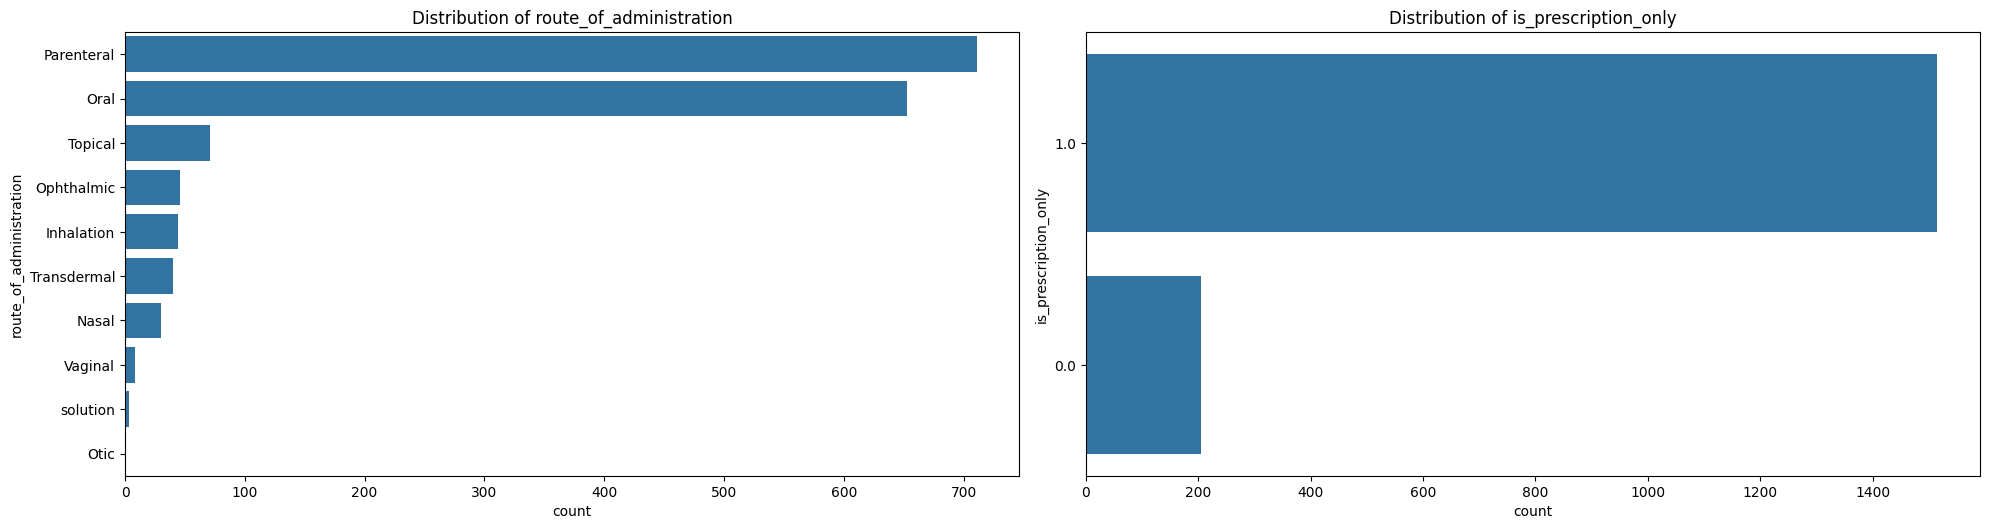

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas
categorical_columns = ['route_of_administration', 'is_prescription_only']

# Gráficos de barras para cada variable categórica
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y=D[col], order=D[col].value_counts().index)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**2. Visualización de la Distribución de Variables Numéricas**

Aplicamos los histogramas ya que nos permiten observar la distribución de las variables numéricas en el dataset.

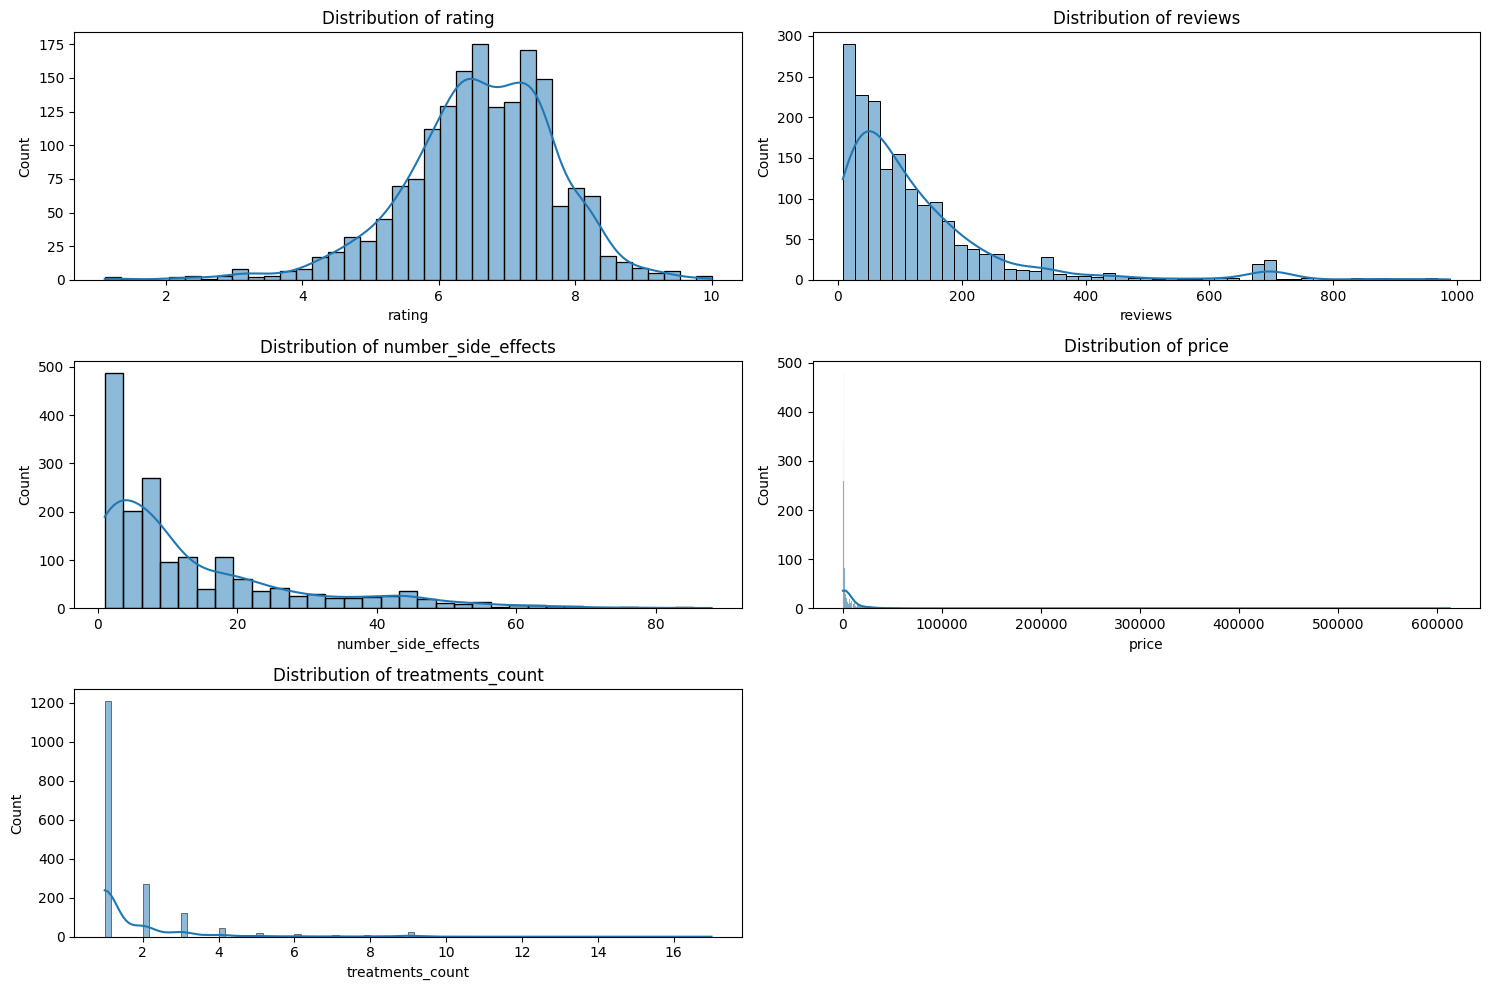

In [ ]:
# Variables numéricas
numerical_columns = ['rating', 'reviews', 'number_side_effects', 'price', 'treatments_count']

# Histograma para cada variable numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(D[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**3. Uso de tablas resumen para demostrar los resultados obtenidos**

In [ ]:
# Tablas de frecuencia para variables categóricas
for col in categorical_columns:
    print(D[col].value_counts())
    print("\n")

route_of_administration
Parenteral     711
Oral           653
Topical         71
Ophthalmic      46
Inhalation      44
Transdermal     40
Nasal           30
Vaginal          8
solution         3
Otic             1
Name: count, dtype: int64


is_prescription_only
1.0    1515
0.0     205
Name: count, dtype: int64




In [ ]:
# Estadísticas descriptivas para variables numéricas
print(D[numerical_columns].describe())

            rating      reviews  number_side_effects          price  \
count  1720.000000  1720.000000          1720.000000    1720.000000   
mean      6.612442   130.791047            13.808721    5957.910663   
std       1.108611   149.812966            15.023698   29268.911816   
min       1.100000     8.000000             1.000000       5.960000   
25%       5.980000    40.000000             3.000000     562.045000   
50%       6.640000    85.900000             8.000000    1058.290000   
75%       7.400000   160.050000            19.000000    3050.375000   
max      10.000000   988.000000            88.000000  612745.390000   

       treatments_count  
count       1720.000000  
mean           1.658721  
std            1.503664  
min            1.000000  
25%            1.000000  
50%            1.000000  
75%            2.000000  
max           17.000000  


## 6. Resolución del problema y conclusiones

La presente investigación representa un esfuerzo meticuloso por analizar en profundidad nuestro conjunto de datos. Este proceso ha sido enriquecido enormemente gracias a la contribución de Wenxi, que es un experto en la materia y cuyos conocimientos han sido fundamentales para interpretar adecuadamente los datos visualizados y desarrollar conclusiones robustas y coherentes.

Uno de los aspectos más destacados de nuestra investigación ha sido la implementación de modelos predictivos avanzados que reflejan con precisión las tendencias de los datos y proporcionan un grado de confianza alto en sus predicciones. Esto nos permite no solo entender mejor el comportamiento de las variables estudiadas, sino también explorar la posibilidad de implementar estos modelos en un entorno de producción real. Como modelo supervisado, el CatBoost Classifier ha demostrado ser particularmente efectivo, alcanzando una precisión del 96% con el conjunto de datos actual. A futuro, sería de gran interés evaluar el desempeño de este modelo con nuevos fármacos que sean aprobados a lo largo del 2024, lo que podría proporcionar insights adicionales y validar aún más la robustez del modelo.

Admeás, nuestra investigación ha incluido el uso de técnicas de clustering, específicamente mediante el algoritmo de k-means. Este enfoque nos ha permitido identificar grupos o clústeres de datos que sirven como un marco de referencia para que equipos multidisciplinares analicen los fármacos desde una perspectiva de mercado. Por ejemplo, hemos podido examinar la relación entre el tiempo que un fármaco ha estado en el mercado y sus efectos secundarios, proporcionando así una métrica confiable para evaluar si un fármaco puede considerarse problemático en términos de sus efectos adversos en relación con su tiempo en el mercado.

Nuestra exploración de los datos también ha revelado algunas correlaciones intrigantes, como la relación entre el precio de los fármacos y la incidencia de efectos secundarios, lo cual podría ser indicativo de drogas potencialmente sujetas a abuso. Además, hemos observado patrones interesantes en las distribuciones de frecuencias que podrían sugerir nuevas áreas de investigación o intervención.

Sin embargo, es importante reconocer que el alcance de esta práctica es acotado y no podemos explorar todas estas relaciones. Sería beneficioso ampliar el alcance de la investigación para explorar más a fondo estas relaciones y expandir nuestra comprensión de cómo las variables estudiadas interactúan en contextos más amplios y diversos.

A lo largo de este proceso, también hemos enfrentado desafíos significativos, especialmente en relación con la gestión y el análisis de grandes volúmenes de datos. La limpieza y preparación de datos, por ejemplo, requirió una atención meticulosa para asegurar que los modelos aplicados operaran sobre información precisa y relevante. Esta etapa fue crucial para evitar sesgos en los modelos y garantizar que las predicciones fueran válidas y aplicables en escenarios reales. En concreto, decidimos dejar de lado modelos como la regresión lineal para la imputación de datos y enfocarnos en usar KNN.
